In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data=pd.DataFrame({'value':np.random.randint(100,120,100),
                   'f':np.random.rand(100)})

In [40]:
data

,value,f
0,102,0.557532
1,110,0.018343
2,103,0.782447
3,108,0.644360
4,105,0.704223
...,...,...
95,118,0.848543
96,103,0.127346
97,101,0.168568
98,100,0.433835


In [41]:
mean=data['value'].sum()/len(data)
mean

109.14

In [42]:
data['value'].mean()

109.14

In [43]:
mean_u=(data['value']*data['f']).sum()/data['f'].sum()
mean_u=round(mean_u,2)
mean_u

109.52

In [44]:
m=data['value'].mode().tolist()
m

[102, 115]

In [45]:
med=data['value'].median()
med

109.0

Text(110.14, 0.03, 'med is 109')

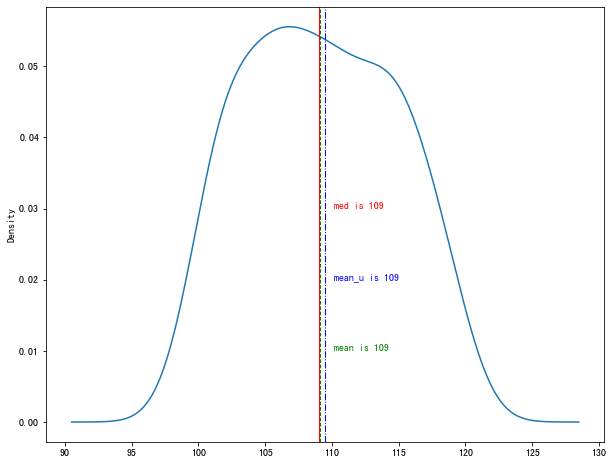

In [50]:
plt.figure(figsize=(10,8))
data['value'].plot(kind='kde')
plt.axvline(mean,color='green',linewidth=1,ls='--',label='mean')
plt.text(mean+1,0.01,'mean is %i'%(mean),color='green')
plt.axvline(mean_u,color='blue',linewidth=1,ls='-.',label='mean_u')
plt.text(mean+1,0.02,'mean_u is %i'%(mean_u),color='blue')
plt.axvline(med,color='red',linewidth=1,ls='-',label='med')
plt.text(mean+1,0.03,'med is %i'%(med),color='red')

In [55]:
data=pd.DataFrame(np.random.rand(60).reshape(30,2)*1000,columns=['A_sale','B_sale'],index=pd.date_range('2017-10-1',periods=30))

In [56]:
data

,A_sale,B_sale
2017-10-01,871.521012,573.218729
2017-10-02,251.581076,279.671434
2017-10-03,862.363854,430.272828
2017-10-04,387.062031,220.109189
2017-10-05,29.489035,932.045557
2017-10-06,939.883220,679.587317
2017-10-07,645.545557,792.524254
2017-10-08,500.956261,375.449313
2017-10-09,138.545768,728.134582
2017-10-10,810.977487,521.586489


In [61]:
def ar(data,*cols):
    a=list()
    for col in cols:
        b=data[col].max()-data[col].min()
        b=round(b,2)
        a.append(b)
    return a

x=ar(data,'A_sale','B_sale')
print('A_sale 的极差为%0.2f,B_sale 的极差为%0.2f'%(x[0],x[1]))

A_sale 的极差为910.39,B_sale 的极差为965.51


In [66]:
sta=data['A_sale'].describe()
stb=data['B_sale'].describe()
sta,stb

(count     30.000000
 mean     498.329947
 std      287.136681
 min       29.489035
 25%      290.400844
 50%      471.481742
 75%      734.495816
 max      939.883220
 Name: A_sale, dtype: float64,
 count     30.000000
 mean     557.744439
 std      308.527442
 min       20.355593
 25%      339.570197
 50%      542.622908
 75%      885.404076
 max      985.865610
 Name: B_sale, dtype: float64)

In [68]:
a_iqr=sta['75%']-sta['25%']
b_iqr=stb['75%']-stb['25%']
print('A_sale 的分位差为%0.2f,B_sale 的分位差为%0.2f'%(a_iqr,b_iqr))

A_sale 的分位差为444.09,B_sale 的分位差为545.83


{'whiskers': [<matplotlib.lines.Line2D at 0x7f87a43aadd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f87a3ee9e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f87a43aad90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f87a43bbed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f87a43bbe10>],
 'means': []}

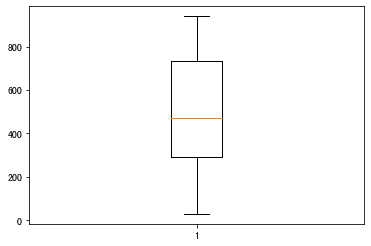

In [95]:
plt.boxplot(data['A_sale'])


In [101]:
a_std=sta['std']
b_std=stb['std']
a_var=np.var(data['A_sale'])
b_var=np.var(data['B_sale'])
print('''A_sale 标准差%0.2f，方差%0.2f;
       B_sale 标准差%0.2f，方差%0.2f'''%(a_std,a_var,b_std,b_var))

A_sale 标准差287.14，方差79699.22;
       B_sale 标准差308.53，方差92016.21


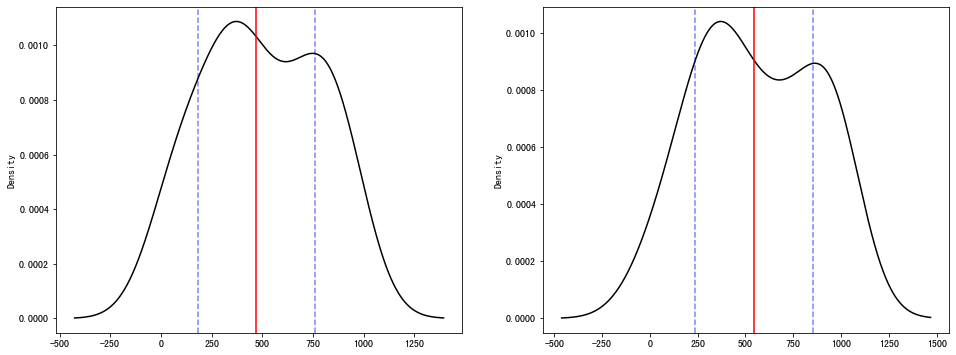

In [115]:
fig=plt.figure(figsize=(16,6))
ax1=fig.add_subplot(121)
data['A_sale'].plot(kind='kde',color='k')
plt.axvline(sta['50%'],ls='-',color='r')
plt.axvline(sta['50%']-a_std,ls='--',color='blue',alpha=0.5)
plt.axvline(sta['50%']+a_std,ls='--',color='blue',alpha=0.5)

ax2=fig.add_subplot(122)
data['B_sale'].plot(kind='kde',color='k')
plt.axvline(stb['50%'],ls='-',color='r')
plt.axvline(stb['50%']-b_std,ls='--',color='blue',alpha=0.5)
plt.axvline(stb['50%']+b_std,ls='--',color='blue',alpha=0.5)